<a href="https://colab.research.google.com/github/thilankam/PyTorch_Tutorials/blob/main/Simple_Graph_Construction_Using_PyG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

1.13.1+cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


Define the node features as a tensor:

In [3]:
# This creates a 4x2 tensor representing the node features.
x = torch.tensor([[0, 1], [1, 0], [0, -1], [-1, 0]], dtype=torch.float)


In [4]:
# Define the edge indices as a tensor:
# This creates a 2x4 tensor representing the edge indices. 
# The first  row contains the source nodes,
# and the second row contains the target nodes.
edge_index = torch.tensor([[0, 1, 2, 3], [1, 2, 3, 0]], dtype=torch.long)


Create the PyG Data object:

In [6]:

import torch
from torch_geometric.data import Data

In [8]:
# This creates a PyG Data object with the node features and edge indices.
data = Data(x=x, edge_index=edge_index)


In [9]:
# Add additional node-level or graph-level attributes to the Data object as desired:
data.y = torch.tensor([0, 1, 0, 1], dtype=torch.float)  # Node labels
data.num_nodes = x.size(0)  # Number of nodes in the graph
data.num_edges = edge_index.size(1)  # Number of edges in the graph


Visualize the graph using networkx and matplotlib:
python


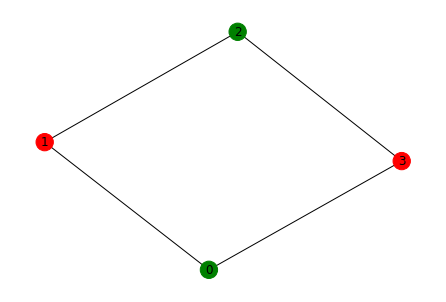

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert edge index to a list of tuples
edge_list = edge_index.t().tolist()

# Create a networkx graph from the edge list
G = nx.Graph()
G.add_edges_from(edge_list)

# Draw the graph with node labels and colors
node_colors = ['red' if y else 'green' for y in data.y.tolist()]
nx.draw(G, with_labels=True, node_color=node_colors)

# Show the plot
plt.show()
